In [6]:
import numpy as np
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K
import helpers as H

np.random.seed(1)

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

In [2]:
#convert 28x28 grayscale to 48x48 rgb channels
def to_rgb(img): 
    img_rgb = np.asarray(np.dstack((img, img, img)))
    img = cv2.resize(img_rgb, (299, 299), interpolation = cv2.INTER_AREA)
    return img

In [3]:
TEST_IMAGES = os.path.join(TRAIN_DATASET_PATH, "test_images")
TEST_IMAGES_PATHS = [os.path.join(TEST_IMAGES, x) for x in H.sort_paths(os.listdir(TEST_IMAGES))]
len(TEST_IMAGES_PATHS)

117

In [4]:
TEST_IMAGES_PATHS[:3]

['E:\\ECIR_2020\\ecir2020\\2D\\dataset\\test_images\\1.npy',
 'E:\\ECIR_2020\\ecir2020\\2D\\dataset\\test_images\\2.npy',
 'E:\\ECIR_2020\\ecir2020\\2D\\dataset\\test_images\\3.npy']

In [5]:
model = load_model("vgg_2D_exp_1.h5")
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 299, 299, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 299, 299, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 299, 299, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 149, 149, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)      

In [7]:
TEST_IMAGES_PATHS[:3]

['E:\\ECIR_2020\\ecir2020\\2D\\dataset\\test_images\\1.npy',
 'E:\\ECIR_2020\\ecir2020\\2D\\dataset\\test_images\\2.npy',
 'E:\\ECIR_2020\\ecir2020\\2D\\dataset\\test_images\\3.npy']

In [8]:
img = np.load(TEST_IMAGES_PATHS[0])
img.shape

(512, 512, 122)

In [9]:
a = H.normalize(img[:,:,10])
a.shape

(512, 512)

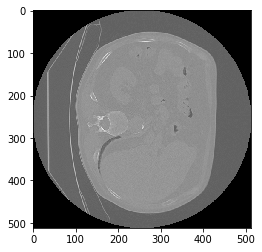

In [10]:
plt.imshow(a, cmap='gray')

In [11]:
a = to_rgb(a)
a.shape

(299, 299, 3)

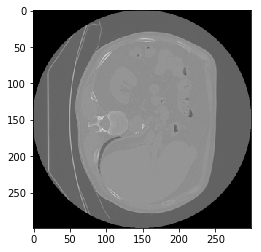

In [12]:
plt.imshow(a)

In [32]:
y_pred_raw = []
y_preds = []

for path in tqdm(TEST_IMAGES_PATHS[:]):
    img = np.load(path)
    y_p = []
    print(img.shape[-1])
    count = img.shape[-1]
    for i in range(count):
        inp = img[:,:,i]
        inp = H.normalize(inp)
        inp = to_rgb(inp)
        inp = np.expand_dims(inp, axis=0)
        # Predict
        y = model.predict(inp)
        # Append preds of all slice to list
        y_p.append(y[0][1])
        #y_p.append(np.argmax(y))
        
    # Predict final volume
    #if 1 in y_p:
     #   y_preds.append(1)
    #else:
     #   y_preds.append(0)
    y_pred_raw.append(y_p)    
    y_p = np.mean(np.array(y_p))
    y_preds.append(y_p)
    
print(len(y_preds), len(y_pred_raw))

  0%|                                                                                          | 0/117 [00:00<?, ?it/s]

122


  1%|▋                                                                                 | 1/117 [00:15<29:02, 15.02s/it]

143


  2%|█▍                                                                                | 2/117 [00:29<28:15, 14.74s/it]

118


  3%|██                                                                                | 3/117 [00:40<26:11, 13.79s/it]

122


  3%|██▊                                                                               | 4/117 [00:53<25:20, 13.46s/it]

138


  4%|███▌                                                                              | 5/117 [01:07<25:35, 13.71s/it]

137


  5%|████▏                                                                             | 6/117 [01:22<25:47, 13.94s/it]

151


  6%|████▉                                                                             | 7/117 [01:37<26:36, 14.51s/it]

121


  7%|█████▌                                                                            | 8/117 [01:50<25:16, 13.91s/it]

130


  8%|██████▎                                                                           | 9/117 [02:04<24:52, 13.82s/it]

140


  9%|██████▉                                                                          | 10/117 [02:18<25:07, 14.09s/it]

140


  9%|███████▌                                                                         | 11/117 [02:33<25:24, 14.38s/it]

116


 10%|████████▎                                                                        | 12/117 [02:46<24:05, 13.76s/it]

139


 11%|█████████                                                                        | 13/117 [03:00<24:18, 14.02s/it]

118


 12%|█████████▋                                                                       | 14/117 [03:13<23:18, 13.58s/it]

124


 13%|██████████▍                                                                      | 15/117 [03:26<22:52, 13.46s/it]

110


 14%|███████████                                                                      | 16/117 [03:38<21:38, 12.86s/it]

258


 15%|███████████▊                                                                     | 17/117 [04:05<28:37, 17.18s/it]

128


 15%|████████████▍                                                                    | 18/117 [04:18<26:29, 16.06s/it]

245


 16%|█████████████▏                                                                   | 19/117 [04:44<30:55, 18.93s/it]

131


 17%|█████████████▊                                                                   | 20/117 [04:58<28:03, 17.36s/it]

129


 18%|██████████████▌                                                                  | 21/117 [05:11<25:53, 16.18s/it]

137


 19%|███████████████▏                                                                 | 22/117 [05:25<24:46, 15.65s/it]

129


 20%|███████████████▉                                                                 | 23/117 [05:39<23:34, 15.04s/it]

138


 21%|████████████████▌                                                                | 24/117 [05:53<22:59, 14.83s/it]

123


 21%|█████████████████▎                                                               | 25/117 [06:06<21:48, 14.22s/it]

119


 22%|██████████████████                                                               | 26/117 [06:18<20:40, 13.64s/it]

122


 23%|██████████████████▋                                                              | 27/117 [06:31<20:07, 13.42s/it]

123


 24%|███████████████████▍                                                             | 28/117 [06:44<19:41, 13.28s/it]

129


 25%|████████████████████                                                             | 29/117 [06:58<19:34, 13.34s/it]

133


 26%|████████████████████▊                                                            | 30/117 [07:12<19:40, 13.57s/it]

117


 26%|█████████████████████▍                                                           | 31/117 [07:24<18:49, 13.13s/it]

131


 27%|██████████████████████▏                                                          | 32/117 [07:38<18:47, 13.27s/it]

145


 28%|██████████████████████▊                                                          | 33/117 [07:53<19:27, 13.90s/it]

136


 29%|███████████████████████▌                                                         | 34/117 [08:08<19:31, 14.12s/it]

138


 30%|████████████████████████▏                                                        | 35/117 [08:23<19:44, 14.44s/it]

113


 31%|████████████████████████▉                                                        | 36/117 [08:35<18:45, 13.90s/it]

146


 32%|█████████████████████████▌                                                       | 37/117 [08:52<19:27, 14.60s/it]

126


 32%|██████████████████████████▎                                                      | 38/117 [09:06<19:11, 14.58s/it]

134


 33%|███████████████████████████                                                      | 39/117 [09:21<18:55, 14.56s/it]

133


 34%|███████████████████████████▋                                                     | 40/117 [09:35<18:36, 14.50s/it]

149


 35%|████████████████████████████▍                                                    | 41/117 [09:51<18:56, 14.96s/it]

145


 36%|█████████████████████████████                                                    | 42/117 [10:07<18:53, 15.11s/it]

138


 37%|█████████████████████████████▊                                                   | 43/117 [10:21<18:31, 15.02s/it]

129


 38%|██████████████████████████████▍                                                  | 44/117 [10:35<17:47, 14.63s/it]

126


 38%|███████████████████████████████▏                                                 | 45/117 [10:48<17:06, 14.26s/it]

135


 39%|███████████████████████████████▊                                                 | 46/117 [11:03<16:51, 14.25s/it]

142


 40%|████████████████████████████████▌                                                | 47/117 [11:18<16:57, 14.53s/it]

137


 41%|█████████████████████████████████▏                                               | 48/117 [11:32<16:39, 14.49s/it]

125


 42%|█████████████████████████████████▉                                               | 49/117 [11:45<15:59, 14.11s/it]

146


 43%|██████████████████████████████████▌                                              | 50/117 [12:02<16:25, 14.71s/it]

125


 44%|███████████████████████████████████▎                                             | 51/117 [12:15<15:49, 14.38s/it]

127


 44%|████████████████████████████████████                                             | 52/117 [12:29<15:17, 14.11s/it]

105


 45%|████████████████████████████████████▋                                            | 53/117 [12:40<14:08, 13.27s/it]

116


 46%|█████████████████████████████████████▍                                           | 54/117 [12:52<13:40, 13.02s/it]

124


 47%|██████████████████████████████████████                                           | 55/117 [13:06<13:30, 13.07s/it]

136


 48%|██████████████████████████████████████▊                                          | 56/117 [13:20<13:43, 13.50s/it]

144


 49%|███████████████████████████████████████▍                                         | 57/117 [13:35<13:58, 13.98s/it]

137


 50%|████████████████████████████████████████▏                                        | 58/117 [13:52<14:40, 14.93s/it]

128


 50%|████████████████████████████████████████▊                                        | 59/117 [14:06<13:58, 14.46s/it]

139


 51%|█████████████████████████████████████████▌                                       | 60/117 [14:21<13:52, 14.61s/it]

253


 52%|██████████████████████████████████████████▏                                      | 61/117 [14:48<17:07, 18.36s/it]

144


 53%|██████████████████████████████████████████▉                                      | 62/117 [15:03<15:59, 17.44s/it]

122


 54%|███████████████████████████████████████████▌                                     | 63/117 [15:16<14:24, 16.01s/it]

122


 55%|████████████████████████████████████████████▎                                    | 64/117 [15:29<13:17, 15.05s/it]

108


 56%|█████████████████████████████████████████████                                    | 65/117 [15:40<12:07, 13.99s/it]

125


 56%|█████████████████████████████████████████████▋                                   | 66/117 [15:53<11:43, 13.80s/it]

131


 57%|██████████████████████████████████████████████▍                                  | 67/117 [16:08<11:37, 13.94s/it]

143


 58%|███████████████████████████████████████████████                                  | 68/117 [16:23<11:41, 14.32s/it]

133


 59%|███████████████████████████████████████████████▊                                 | 69/117 [16:37<11:26, 14.30s/it]

139


 60%|████████████████████████████████████████████████▍                                | 70/117 [16:52<11:20, 14.48s/it]

135


 61%|█████████████████████████████████████████████████▏                               | 71/117 [17:06<11:04, 14.44s/it]

125


 62%|█████████████████████████████████████████████████▊                               | 72/117 [17:20<10:33, 14.07s/it]

135


 62%|██████████████████████████████████████████████████▌                              | 73/117 [17:34<10:25, 14.21s/it]

143


 63%|███████████████████████████████████████████████████▏                             | 74/117 [17:49<10:19, 14.40s/it]

116


 64%|███████████████████████████████████████████████████▉                             | 75/117 [18:01<09:37, 13.75s/it]

124


 65%|████████████████████████████████████████████████████▌                            | 76/117 [18:15<09:18, 13.61s/it]

119


 66%|█████████████████████████████████████████████████████▎                           | 77/117 [18:28<09:01, 13.54s/it]

135


 67%|██████████████████████████████████████████████████████                           | 78/117 [18:43<09:10, 14.12s/it]

120


 68%|██████████████████████████████████████████████████████▋                          | 79/117 [18:57<08:49, 13.94s/it]

147


 68%|███████████████████████████████████████████████████████▍                         | 80/117 [19:13<09:02, 14.66s/it]

127


 69%|████████████████████████████████████████████████████████                         | 81/117 [19:27<08:41, 14.49s/it]

132


 70%|████████████████████████████████████████████████████████▊                        | 82/117 [19:42<08:24, 14.42s/it]

140


 71%|█████████████████████████████████████████████████████████▍                       | 83/117 [19:57<08:15, 14.58s/it]

141


 72%|██████████████████████████████████████████████████████████▏                      | 84/117 [20:12<08:10, 14.86s/it]

101


 73%|██████████████████████████████████████████████████████████▊                      | 85/117 [20:23<07:15, 13.60s/it]

121


 74%|███████████████████████████████████████████████████████████▌                     | 86/117 [20:36<06:55, 13.42s/it]

153


 74%|████████████████████████████████████████████████████████████▏                    | 87/117 [20:52<07:07, 14.26s/it]

126


 75%|████████████████████████████████████████████████████████████▉                    | 88/117 [21:06<06:48, 14.09s/it]

146


 76%|█████████████████████████████████████████████████████████████▌                   | 89/117 [21:22<06:56, 14.86s/it]

141


 77%|██████████████████████████████████████████████████████████████▎                  | 90/117 [21:38<06:50, 15.21s/it]

135


 78%|███████████████████████████████████████████████████████████████                  | 91/117 [21:54<06:38, 15.35s/it]

116


 79%|███████████████████████████████████████████████████████████████▋                 | 92/117 [22:06<06:00, 14.42s/it]

121


 79%|████████████████████████████████████████████████████████████████▍                | 93/117 [22:19<05:35, 13.97s/it]

145


 80%|█████████████████████████████████████████████████████████████████                | 94/117 [22:34<05:30, 14.35s/it]

124


 81%|█████████████████████████████████████████████████████████████████▊               | 95/117 [22:47<05:07, 13.97s/it]

136


 82%|██████████████████████████████████████████████████████████████████▍              | 96/117 [23:02<04:56, 14.11s/it]

106


 83%|███████████████████████████████████████████████████████████████████▏             | 97/117 [23:14<04:27, 13.37s/it]

128


 84%|███████████████████████████████████████████████████████████████████▊             | 98/117 [23:27<04:16, 13.51s/it]

130


 85%|████████████████████████████████████████████████████████████████████▌            | 99/117 [23:41<04:05, 13.66s/it]

122


 85%|████████████████████████████████████████████████████████████████████▍           | 100/117 [23:55<03:53, 13.71s/it]

138


 86%|█████████████████████████████████████████████████████████████████████           | 101/117 [24:10<03:44, 14.00s/it]

141


 87%|█████████████████████████████████████████████████████████████████████▋          | 102/117 [24:25<03:34, 14.28s/it]

149


 88%|██████████████████████████████████████████████████████████████████████▍         | 103/117 [24:41<03:29, 14.95s/it]

133


 89%|███████████████████████████████████████████████████████████████████████         | 104/117 [24:57<03:16, 15.10s/it]

141


 90%|███████████████████████████████████████████████████████████████████████▊        | 105/117 [25:12<03:02, 15.20s/it]

128


 91%|████████████████████████████████████████████████████████████████████████▍       | 106/117 [25:26<02:42, 14.81s/it]

131


 91%|█████████████████████████████████████████████████████████████████████████▏      | 107/117 [25:40<02:25, 14.57s/it]

118


 92%|█████████████████████████████████████████████████████████████████████████▊      | 108/117 [25:53<02:06, 14.01s/it]

147


 93%|██████████████████████████████████████████████████████████████████████████▌     | 109/117 [26:09<01:56, 14.57s/it]

137


 94%|███████████████████████████████████████████████████████████████████████████▏    | 110/117 [26:24<01:43, 14.75s/it]

124


 95%|███████████████████████████████████████████████████████████████████████████▉    | 111/117 [26:37<01:26, 14.40s/it]

125


 96%|████████████████████████████████████████████████████████████████████████████▌   | 112/117 [26:51<01:10, 14.15s/it]

138


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 113/117 [27:06<00:57, 14.30s/it]

122


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 114/117 [27:18<00:41, 13.86s/it]

124


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 115/117 [27:32<00:27, 13.62s/it]

135


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [27:46<00:13, 13.81s/it]

141


100%|████████████████████████████████████████████████████████████████████████████████| 117/117 [28:01<00:00, 14.18s/it]


117 117


In [33]:
y_preds

[0.41787025,
 0.4252903,
 0.43017876,
 0.4323163,
 0.41291162,
 0.41744927,
 0.45139742,
 0.41308975,
 0.41595933,
 0.40730506,
 0.41329226,
 0.4444508,
 0.41877776,
 0.40848035,
 0.42276597,
 0.43789637,
 0.44272572,
 0.39987358,
 0.47942454,
 0.41367555,
 0.3996277,
 0.47367898,
 0.40731412,
 0.41448918,
 0.41092008,
 0.40113524,
 0.40914515,
 0.42032102,
 0.42926002,
 0.42459947,
 0.44217893,
 0.41869676,
 0.4086195,
 0.4295692,
 0.43121397,
 0.42034563,
 0.4308994,
 0.4196402,
 0.41728178,
 0.41219577,
 0.45318797,
 0.4068514,
 0.41817456,
 0.403696,
 0.41844663,
 0.4399066,
 0.4308789,
 0.41179746,
 0.42628118,
 0.43351772,
 0.412811,
 0.42466578,
 0.42696524,
 0.41640672,
 0.41678596,
 0.4163899,
 0.39701557,
 0.4084847,
 0.42600814,
 0.42683613,
 0.42477974,
 0.44882855,
 0.41707358,
 0.4225166,
 0.41697255,
 0.5023778,
 0.4116076,
 0.43258175,
 0.41034538,
 0.4045229,
 0.41402742,
 0.41776893,
 0.41837737,
 0.41480446,
 0.40977374,
 0.41719094,
 0.4075355,
 0.42362264,
 0.50649

In [34]:
import pandas as pd
dt = pd.read_csv('TestSet_metaData.csv')
dt.head()

,Filename,md_Disability,md_Relapse,md_SymptomsOfTB,md_Comorbidity,md_Bacillary,md_DrugResistance,md_HigherEducation,md_ExPrisoner,md_Alcoholic,md_Smoking
0,CTR_TST_001.nii.gz,0,1,1,1,0,0,1,0,0,0
1,CTR_TST_002.nii.gz,0,1,0,0,1,4,0,0,0,1
2,CTR_TST_003.nii.gz,0,0,0,0,1,3,0,0,0,1
3,CTR_TST_004.nii.gz,0,1,1,0,0,0,0,0,1,1
4,CTR_TST_005.nii.gz,1,1,0,0,1,3,0,0,0,1


In [35]:
patient_names = dt['Filename'].values
len(patient_names)

117

In [36]:
names = []

for name in patient_names:
    names.append(name[:-7])
names[:3]

['CTR_TST_001', 'CTR_TST_002', 'CTR_TST_003']

In [37]:
len(y_preds), len(names)

(117, 117)

In [38]:
for n, p in zip(names, y_preds):
    print(n, p)

CTR_TST_001 0.41787025
CTR_TST_002 0.4252903
CTR_TST_003 0.43017876
CTR_TST_004 0.4323163
CTR_TST_005 0.41291162
CTR_TST_006 0.41744927
CTR_TST_007 0.45139742
CTR_TST_008 0.41308975
CTR_TST_009 0.41595933
CTR_TST_010 0.40730506
CTR_TST_011 0.41329226
CTR_TST_012 0.4444508
CTR_TST_013 0.41877776
CTR_TST_014 0.40848035
CTR_TST_015 0.42276597
CTR_TST_016 0.43789637
CTR_TST_017 0.44272572
CTR_TST_018 0.39987358
CTR_TST_019 0.47942454
CTR_TST_020 0.41367555
CTR_TST_021 0.3996277
CTR_TST_022 0.47367898
CTR_TST_023 0.40731412
CTR_TST_024 0.41448918
CTR_TST_025 0.41092008
CTR_TST_026 0.40113524
CTR_TST_027 0.40914515
CTR_TST_028 0.42032102
CTR_TST_029 0.42926002
CTR_TST_030 0.42459947
CTR_TST_031 0.44217893
CTR_TST_032 0.41869676
CTR_TST_033 0.4086195
CTR_TST_034 0.4295692
CTR_TST_035 0.43121397
CTR_TST_036 0.42034563
CTR_TST_037 0.4308994
CTR_TST_038 0.4196402
CTR_TST_039 0.41728178
CTR_TST_040 0.41219577
CTR_TST_041 0.45318797
CTR_TST_042 0.4068514
CTR_TST_043 0.41817456
CTR_TST_044 0.403696

In [40]:
with open('ecir_2D_result.txt', 'w') as f:
    for n, p in zip(names, y_preds):
        print(n,",", p)
        f.write(str(n))
        f.write(",")
        f.write(str(p))
        f.write("\n")
        
f.close()


CTR_TST_001 , 0.41787025
CTR_TST_002 , 0.4252903
CTR_TST_003 , 0.43017876
CTR_TST_004 , 0.4323163
CTR_TST_005 , 0.41291162
CTR_TST_006 , 0.41744927
CTR_TST_007 , 0.45139742
CTR_TST_008 , 0.41308975
CTR_TST_009 , 0.41595933
CTR_TST_010 , 0.40730506
CTR_TST_011 , 0.41329226
CTR_TST_012 , 0.4444508
CTR_TST_013 , 0.41877776
CTR_TST_014 , 0.40848035
CTR_TST_015 , 0.42276597
CTR_TST_016 , 0.43789637
CTR_TST_017 , 0.44272572
CTR_TST_018 , 0.39987358
CTR_TST_019 , 0.47942454
CTR_TST_020 , 0.41367555
CTR_TST_021 , 0.3996277
CTR_TST_022 , 0.47367898
CTR_TST_023 , 0.40731412
CTR_TST_024 , 0.41448918
CTR_TST_025 , 0.41092008
CTR_TST_026 , 0.40113524
CTR_TST_027 , 0.40914515
CTR_TST_028 , 0.42032102
CTR_TST_029 , 0.42926002
CTR_TST_030 , 0.42459947
CTR_TST_031 , 0.44217893
CTR_TST_032 , 0.41869676
CTR_TST_033 , 0.4086195
CTR_TST_034 , 0.4295692
CTR_TST_035 , 0.43121397
CTR_TST_036 , 0.42034563
CTR_TST_037 , 0.4308994
CTR_TST_038 , 0.4196402
CTR_TST_039 , 0.41728178
CTR_TST_040 , 0.41219577
CTR_TST_